In [22]:
import os
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

# This document will create a set of clusters from a list of selected features and them project the multi-dimentional data set into a two dimentional plane

In [23]:
#Get the data from the Github repository
r = requests.get("https://github.com/AhmadzadehSanaz/Studio-Lab-Healthcare-Ellinger/raw/main/Data%20Pipeline/hexagon_collection_master.geojson")

In [24]:
#Turn the data into JSON format
data = r.json()

In [84]:
#For loop to get all the data inside each of the features by hex grid cell
features = [f["properties"] for f in data["features"]]

In [85]:
#Turn all the data into a pandas data frame
df = pd.DataFrame.from_records(features)

In [86]:
#See all the data inside the panda data frame
df.head()

,fid,id,top,right,bottom,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,...,nearest_bike_station_name,nearest_bike_station_distance,bike_station_count,predominant_race_by_population_per_cell,hispanic_or_latino_cell,non_hispanic_african_american_or_black_cell,non_hispanic_asian_or_pacific_islander_cell,non_hispanic_white_cell,cluster,distance_to_cluster_centroids
0,1,6274,1.913898e+06,1.162049e+06,1.911258e+06,140500.000000,79532.000000,28172.500000,5053.500000,2817.0,...,Western Ave & Winnebago Ave,0.072335,2.0,Non-Hispanic White,0,0,0,1,5,0.134324
1,2,6275,1.911258e+06,1.162049e+06,1.908618e+06,133000.000000,84458.000000,22477.000000,6551.000000,3373.0,...,Claremont Ave & Hirsch St,0.054763,3.0,Non-Hispanic White,0,0,0,1,5,0.323581
2,3,6272,1.919178e+06,1.162049e+06,1.916538e+06,159750.000000,53749.750000,16572.250000,2050.750000,2369.0,...,Logan Blvd & Elston Ave,0.091337,1.0,Non-Hispanic White,0,0,0,1,2,0.154544
3,4,6273,1.916538e+06,1.162049e+06,1.913898e+06,148000.000000,74606.000000,33868.000000,3556.000000,2261.0,...,Campbell Ave & Fullerton Ave,0.219662,1.0,Hispanic or Latino,1,0,0,0,5,0.246169
4,5,6278,1.903338e+06,1.162049e+06,1.900698e+06,110333.333333,55750.666667,9764.666667,14421.666667,4577.0,...,Artesian Ave & Hubbard St,0.216887,1.0,Non-Hispanic White,0,0,0,1,1,0.155885


In [29]:
#See all the columns inside the data frame
df.columns

Index(['fid', 'id', 'top', 'right', 'bottom', 'adult_obesity',
       'total_population', 'hispanic_or_latino_population_number_mean',
       'non_hispanic_african_american_or_black_population_number_mean',
       'non_hispanic_asian_or_pacific_islander_population_number_mean',
       'non_hispanic_white_population_number_mean', 'park_count',
       'population_no_health_insurance', 'median_household_income',
       'hospital_count', 'cta_rail_station_count', 'cta_bus_station_count',
       'asthma_population_number', 'diabetes_population_number',
       'air_quality_index_number', 'air_quality_PM10_number\t',
       'air_quality_PM25_number', 'nearest_park_name', 'nearest_park_distance',
       'nearest_hospital_name', 'nearest_hospital_distance',
       'nearest_cta_rail_station_name', 'nearest_cta_rail_station_distance',
       'nearest_bus_station_name', 'nearest_bus_station_distance',
       'nearest_bike_station_name', 'nearest_bike_station_distance',
       'bike_station_count',

In [87]:
#Exclude all these columns from the data frame as they do not provide any particular information
exclude = ['fid', 'id', 'top', 'right', 'bottom',"predominant_race_by_population_per_cell"]

In [88]:
#For loop to get al the columns with the word "name" in it. Most of the columsn contain categorical data
withName = [i for i in df.columns if "name" in i]

In [89]:
#Combine both excluded columns
exclude = exclude + withName

In [90]:
#See those columns to be excluded from the data frame
exclude

['fid',
 'id',
 'top',
 'right',
 'bottom',
 'predominant_race_by_population_per_cell',
 'nearest_park_name',
 'nearest_hospital_name',
 'nearest_cta_rail_station_name',
 'nearest_bus_station_name',
 'nearest_bike_station_name']

In [91]:
#Create a new data frame without the excluded columns
X = df.drop(exclude,axis=1)

In [92]:
#See the data inside the X data frame
X.head()

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,nearest_cta_rail_station_distance,nearest_bus_station_distance,nearest_bike_station_distance,bike_station_count,hispanic_or_latino_cell,non_hispanic_african_american_or_black_cell,non_hispanic_asian_or_pacific_islander_cell,non_hispanic_white_cell,cluster,distance_to_cluster_centroids
0,140500.000000,79532.000000,28172.500000,5053.500000,2817.0,41541.500000,2,10409.000000,73183.000000,0,...,0.090404,0.054090,0.072335,2.0,0,0,0,1,5,0.134324
1,133000.000000,84458.000000,22477.000000,6551.000000,3373.0,49729.000000,2,9424.000000,79013.000000,1,...,0.435950,0.067718,0.054763,3.0,0,0,0,1,5,0.323581
2,159750.000000,53749.750000,16572.250000,2050.750000,2369.0,31349.750000,1,6492.250000,80099.250000,0,...,0.822329,0.112082,0.091337,1.0,0,0,0,1,2,0.154544
3,148000.000000,74606.000000,33868.000000,3556.000000,2261.0,33354.000000,2,11394.000000,67353.000000,0,...,0.484871,0.097150,0.219662,1.0,1,0,0,0,5,0.246169
4,110333.333333,55750.666667,9764.666667,14421.666667,4577.0,25626.333333,2,5573.666667,54067.333333,0,...,0.559566,0.028106,0.216887,1.0,0,0,0,1,1,0.155885


In [36]:
#Setup the min max scaler to change the values between 0 and 1
min_max_scaler = MinMaxScaler()

In [37]:
#Run the scaler though all the columns in the data frame
X[X.columns] = min_max_scaler.fit_transform(X)

In [38]:
#Print the new data frame
X

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,nearest_park_distance,nearest_hospital_distance,nearest_cta_rail_station_distance,nearest_bus_station_distance,nearest_bike_station_distance,bike_station_count,hispanic_or_latino_cell,non_hispanic_african_american_or_black_cell,non_hispanic_asian_or_pacific_islander_cell,non_hispanic_white_cell
0,0.308791,0.786628,0.446812,0.062502,0.169281,0.526560,0.4,0.532468,0.624494,0.000000,...,0.018361,0.088000,0.011157,0.009420,0.005863,0.2,0.0,0.0,0.0,1.0
1,0.292308,0.838293,0.356264,0.081318,0.202692,0.630433,0.4,0.479607,0.686446,0.333333,...,0.030327,0.004531,0.057436,0.011970,0.004200,0.3,0.0,0.0,0.0,1.0
2,0.351099,0.516217,0.262389,0.024774,0.142359,0.397259,0.2,0.322274,0.697989,0.000000,...,0.038624,0.255351,0.109183,0.020268,0.007661,0.1,0.0,0.0,0.0,1.0
3,0.325275,0.734963,0.537361,0.043687,0.135869,0.422687,0.4,0.585328,0.562542,0.000000,...,0.000000,0.171671,0.063988,0.017475,0.019806,0.1,1.0,0.0,0.0,0.0
4,0.242491,0.537203,0.154160,0.180209,0.275044,0.324647,0.4,0.272978,0.421363,0.000000,...,0.040433,0.175539,0.073991,0.004560,0.019543,0.1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0.278022,0.077214,0.068243,0.061968,0.000030,0.030524,0.0,0.056805,0.344403,0.000000,...,0.058770,0.700794,0.742663,0.038307,0.022058,0.1,0.0,1.0,0.0,0.0
1234,0.147253,0.255787,0.037297,0.201083,0.006610,0.122453,0.0,0.101374,0.474066,0.000000,...,0.056197,0.293321,0.564637,0.098403,0.135421,0.0,0.0,1.0,0.0,0.0
1235,0.147253,0.255787,0.037297,0.201083,0.006610,0.122453,0.0,0.101374,0.474066,0.000000,...,0.102028,0.214446,0.609258,0.074673,0.173136,0.0,0.0,1.0,0.0,0.0
1236,0.139560,0.213399,0.027647,0.144316,0.005979,0.137386,0.0,0.060266,0.654769,0.000000,...,0.040772,0.253402,0.490846,0.086028,0.091853,0.0,0.0,1.0,0.0,0.0


In [46]:
#Double check all the columns in the X data frame
X.columns

Index(['adult_obesity', 'total_population',
       'hispanic_or_latino_population_number_mean',
       'non_hispanic_african_american_or_black_population_number_mean',
       'non_hispanic_asian_or_pacific_islander_population_number_mean',
       'non_hispanic_white_population_number_mean', 'park_count',
       'population_no_health_insurance', 'median_household_income',
       'hospital_count', 'cta_rail_station_count', 'cta_bus_station_count',
       'asthma_population_number', 'diabetes_population_number',
       'air_quality_index_number', 'air_quality_PM10_number\t',
       'air_quality_PM25_number', 'nearest_park_distance',
       'nearest_hospital_distance', 'nearest_cta_rail_station_distance',
       'nearest_bus_station_distance', 'nearest_bike_station_distance',
       'bike_station_count', 'hispanic_or_latino_cell',
       'non_hispanic_african_american_or_black_cell',
       'non_hispanic_asian_or_pacific_islander_cell',
       'non_hispanic_white_cell'],
      dtype='objec

In [93]:
#List of the selected features to generate the cluster with
#If you want to try another set of features, select them from the previous cell
cluster_features = ["adult_obesity","population_no_health_insurance","hospital_count","diabetes_population_number", "nearest_park_distance"]

In [48]:
#Select the number of cluster, by which the previous features will be grouped by
n_clusters = 7

In [50]:
#Apply the scaler
min_max_scaler = MinMaxScaler()
X[X.columns] = min_max_scaler.fit_transform(X)

In [51]:
#Select the list of desired features to cluster
if cluster_features:
    X = X[cluster_features]

In [96]:
#Begin the training for the Kmeans / random_state will allow to obtain the same results on each run
kmeans = KMeans(n_clusters=n_clusters,random_state=23)

In [53]:
kmeans = kmeans.fit(X)

In [95]:
#Find and display the cluster for each of the hexagonal cells
clusters = kmeans.labels_
clusters

array([5, 5, 2, ..., 1, 1, 1])

In [55]:
#Find and display the distance to the cluster centroids from each newly generated point
distance_to_centroids = kmeans.transform(X)
distance_to_centroids

array([[0.39633683, 0.52623918, 0.4031914 , ..., 1.00141636, 0.13432401,
        0.61313059],
       [0.5940585 , 0.52835651, 0.43825055, ..., 0.97539684, 0.32358113,
        0.6903965 ],
       [0.64375756, 0.31376905, 0.15454424, ..., 0.82926018, 0.20688387,
        0.53890047],
       ...,
       [0.99356603, 0.09049056, 0.34553567, ..., 0.73033115, 0.49321169,
        0.83444831],
       [1.05692511, 0.14440594, 0.38913555, ..., 0.7733854 , 0.55496825,
        0.87196225],
       [0.99271204, 0.08098167, 0.34258905, ..., 0.76165821, 0.49091551,
        0.83307719]])

In [56]:
#Find and display all the cluster centroids
cluster_centroids = kmeans.cluster_centers_
cluster_centroids

array([[ 4.01579670e-01,  8.49788357e-01,  1.25000000e-02,
         8.50426136e-01,  6.08069944e-02],
       [ 1.66134253e-01,  1.72158940e-01,  9.68992248e-03,
         2.83110906e-01,  6.16390014e-02],
       [ 4.26992444e-01,  2.54291944e-01,  2.25442834e-02,
         3.73231408e-01,  5.66140117e-02],
       [ 4.03310036e-01,  7.73502644e-02,  7.66283525e-03,
         7.22091606e-02,  8.65524570e-02],
       [ 5.18681319e-01,  1.79778899e-01,  0.00000000e+00,
        -5.55111512e-17,  6.73672171e-01],
       [ 2.41159951e-01,  4.88896780e-01,  1.48148148e-02,
         5.35845960e-01,  5.36774163e-02],
       [ 8.85949765e-01,  3.51340292e-01,  5.95238095e-03,
         5.42816558e-01,  5.33402628e-02]])

In [57]:
distance_to_cluster_centroid = []
#Distance to each cluster
for i in range(len(kmeans.transform(X))):
    print (kmeans.transform(X)[i][kmeans.labels_[i]])
    distance_to_cluster_centroid.append(kmeans.transform(X)[i][kmeans.labels_[i]])

0.1343240067363738
0.32358113158972557
0.15454424279302867
0.2461685337384564
0.15588514819877927
0.05560576257116768
0.32302303186607007
0.05522625382428588
0.13527502325588925
0.16561884265064902
0.22788489922436772
0.10584442412925335
0.07250875097621863
0.13736959366695498
0.22223584200895208
0.03879079796372515
0.24058581705347912
0.08980700943253062
0.2277806294897959
0.04037898647605453
0.20226126491532465
0.034047521484188936
0.26834415720202287
0.1351622163237601
0.2705156700976055
0.13378500679774397
0.09220728899447074
0.1352648531724065
0.14590841131855015
0.13427478066325907
0.25029388631617094
0.18783375241406058
0.253435718752464
0.16738867991715897
0.17504865808310704
0.13377890647054183
0.24907779285652937
0.1713783589704396
0.1786632071788644
0.13820088825431856
0.08883104330691419
0.18508409754225788
0.20739858765906302
0.2082694779667352
0.23752960664575207
0.2810325554273637
0.2806841376178431
0.09500185183520343
0.18141708639128326
0.3522777191962102
0.30916206796

0.1175189642107568
0.06531840445365357
0.10609504324586118
0.167511113873357
0.15419863311268017
0.10253016800395764
0.1003367734619858
0.16622546842709218
0.4560280315679941
0.15585535873352774
0.12359425815706167
0.07730920504772722
0.09499487710429882
0.20518652852407857
0.16580322314473422
0.20554703995541876
0.20875588252523658
0.13169062084793584
0.07077362431878029
0.13256839490049854
0.1301393004918963
0.10080773273746978
0.1037296460830621
0.12124639680014855
0.3346481777890432
0.21015728109086917
0.1854029620579305
0.12339449114459204
0.11462576855191534
0.14174997405652043
0.145798456411292
0.19035367233980313
0.28781473584604916
0.14191359143285182
0.2840479262072646
0.11747810089899319
0.21520568896093292
0.05814780605384033
0.18526043337305093
0.15592505193551387
0.1565956989585096
0.1571809284371004
0.1521772413424609
0.1128545968360229
0.1578302864622599
0.15295360510254358
0.1568113463343533
0.3549867003483594
0.15200069092065197
0.20960166002359257
0.1770237709274002


0.14407366137319622
0.12843433657139822
0.13293722204470831
0.17119975594316794
0.17144912282238636
0.12078410180140829
0.10450895800508321
0.1217076576769635
0.3409589414242869
0.11697499922707016
0.13088705811053541
0.21790274210262695
0.30611239671450846
0.20903187433282716
0.221630919877947
0.19095428959879623
0.10513874171608618
0.24288270676058402
0.24176552547390665
0.1459717009870809
0.17038512789275606
0.1734556631528202
0.13479440343008375
0.3908808623565496
0.10420021422327959
0.3823091778017201
0.10707723592305218
0.1438615191555199
0.16218344511049018
0.18123400710585147
0.1552497731928037
0.17365923893860424
0.2000956103829791
0.17348846487896175
0.13930274386224448
0.16331083907898464
0.1899623631237961
0.054259040548985775
0.07937696268280264
0.11031455551943788
0.04525717594621489
0.20220685893805865
0.21842941561738421
0.1367686693541212
0.2156687486552782
0.21163474140097804
0.2132820449832222
0.16224086605245908
0.15313443122049575
0.16372492073226783
0.160868680783

In [97]:
#Add the cluster number to the main data frame
df["clusters"] = clusters

In [98]:
#Add the distance to the cluster centroids to the main data frame
df['distance_to_cluster_centroids'] = distance_to_cluster_centroid

In [60]:
for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

In [61]:
for i,f in enumerate(data["features"]):
  f["properties"]["distance_to_cluster_centroids"] = float(distance_to_cluster_centroid[i])

In [62]:
#Save the data frame into a geoJSON format to the local folder
with open("geojsonWCluster.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

In [99]:
#See all the data
data

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'fid': 1,
    'id': 6274,
    'top': 1913897.9448048582,
    'right': 1162049.0416800373,
    'bottom': 1911257.9448048582,
    'adult_obesity': 140500.0,
    'total_population': 79532.0,
    'hispanic_or_latino_population_number_mean': 28172.5,
    'non_hispanic_african_american_or_black_population_number_mean': 5053.5,
    'non_hispanic_asian_or_pacific_islander_population_number_mean': 2817.0,
    'non_hispanic_white_population_number_mean': 41541.5,
    'park_count': 2,
    'population_no_health_insurance': 10409.0,
    'median_household_income': 73183.0,
    'hospital_count': 0,
    'cta_rail_station_count': 1,
    'cta_bus_station_count': 22,
    'asthma_population_number': 6350.0,
    'diabetes_population_number': 5600.0,
    'air_quality_index_number': 33.31,
    'air_quality_PM10_number\t': 22.205,
    'air_quali

In [100]:
#Extract all the features from the data frame
df_features = df[cluster_features]

In [65]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
df_features_standarized = StandardScaler().fit_transform(df_features)
df_features_standarized

array([[-0.15533427,  1.13380183, -0.17269382,  1.26986649, -0.52771953],
       [-0.23824315,  0.90033005,  4.68628235,  0.84148508, -0.44670616],
       [ 0.05746518,  0.20542561, -0.17269382,  0.63919386, -0.39053771],
       ...,
       [-0.96784128, -0.77023754, -0.17269382, -0.34846327,  0.03871676],
       [-1.00653209, -0.95180036, -0.17269382, -0.56265398, -0.37599178],
       [-0.96784128, -0.77023754, -0.17269382, -0.34846327, -0.22881087]])

In [66]:
standarized_cluster_centroids = StandardScaler().fit_transform(cluster_centroids)
standarized_cluster_centroids

array([[-0.15493109,  2.10418441,  0.30909252,  1.72612449, -0.41381219],
       [-1.25200942, -0.68777185, -0.11502286, -0.35402236, -0.40992909],
       [-0.03651807, -0.34936896,  1.82504184, -0.02358194, -0.43338149],
       [-0.1468683 , -1.07840081, -0.4209642 , -1.12732541, -0.29365413],
       [ 0.39071419, -0.65637623, -1.5774897 , -1.39209119,  2.44652452],
       [-0.90242068,  0.61724557,  0.6584596 ,  0.57266883, -0.44708704],
       [ 2.10203336,  0.05048786, -0.67911721,  0.59822758, -0.44866058]])

# *UMAP Projection Section*

In [67]:
import umap.umap_ as umap

In [68]:
#Create the reducer to bring the data down into two dimensions
reducer = umap.UMAP(n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42)
embedding = reducer.fit_transform(X)
embedding.shape

(1238, 2)

In [69]:
#Create the reducer for the cluster centroids
reducer_a = umap.UMAP(n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42)
embedding_1 = reducer_a.fit_transform(cluster_centroids)
embedding_1.shape

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1678: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


(7, 2)

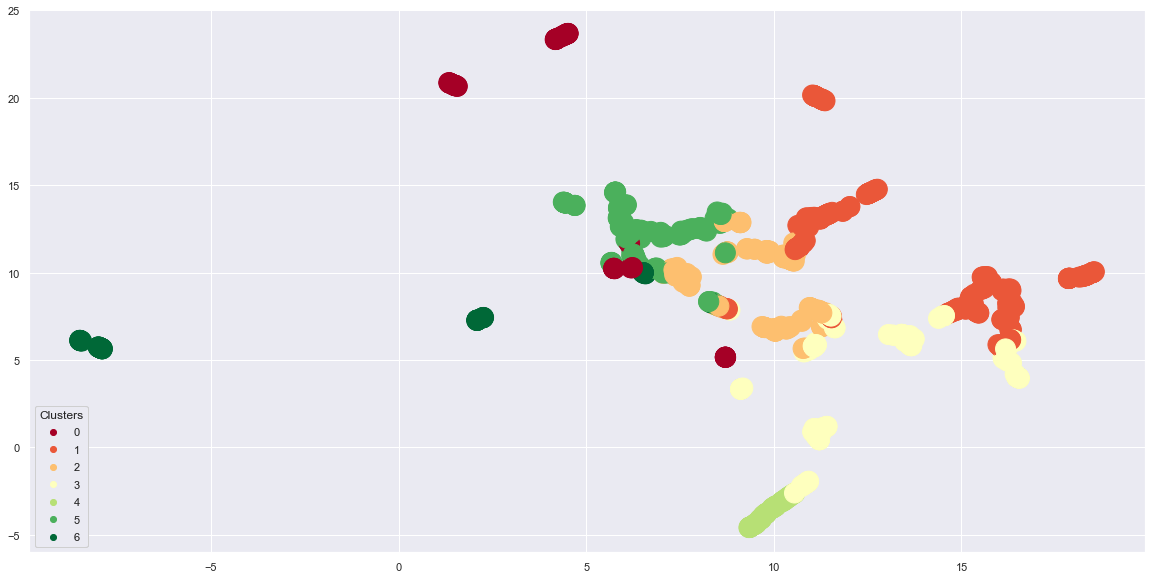

In [82]:
#Plot the newly reduced data & Save locally
fig, ax = plt.subplots(figsize=(20,10))
#plt.scatter(embedding_1[:, 0],embedding_1[:, 1], color = "black")
scatter = ax.scatter(embedding[:, 0],embedding[:, 1], c=clusters, s=400, cmap='RdYlGn')
legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title= "Clusters")
ax.add_artist(legend1)
plt.savefig('selected_features_cluster_fixed.png')

In [71]:
df_features

,adult_obesity,population_no_health_insurance,hospital_count,diabetes_population_number,nearest_park_distance
0,140500.000000,10409.000000,0,5600.000000,0.107567
1,133000.000000,9424.000000,1,4700.000000,0.175790
2,159750.000000,6492.250000,0,4275.000000,0.223092
3,148000.000000,11394.000000,0,6500.000000,0.002885
4,110333.333333,5573.666667,0,3266.666667,0.233405
...,...,...,...,...,...
1233,126500.000000,1545.500000,0,2300.000000,0.337951
1234,67000.000000,2376.000000,0,2200.000000,0.323281
1235,67000.000000,2376.000000,0,2200.000000,0.584580
1236,63500.000000,1610.000000,0,1750.000000,0.235341


In [72]:
df_features_clusters = df[cluster_features+["clusters"]]

In [73]:
df_features_clusters['distance_to_cluster_centroids'] = distance_to_cluster_centroid

<ipython-input-73-fa71280574cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_clusters['distance_to_cluster_centroids'] = distance_to_cluster_centroid


In [74]:
#Create a clean data set with just the selected deatures and cluster number for each one of the fid cells
clean_data = df_features_clusters.drop('distance_to_cluster_centroids', axis=1)

In [75]:
clean_data

,adult_obesity,population_no_health_insurance,hospital_count,diabetes_population_number,nearest_park_distance,clusters
0,140500.000000,10409.000000,0,5600.000000,0.107567,5
1,133000.000000,9424.000000,1,4700.000000,0.175790,5
2,159750.000000,6492.250000,0,4275.000000,0.223092,2
3,148000.000000,11394.000000,0,6500.000000,0.002885,5
4,110333.333333,5573.666667,0,3266.666667,0.233405,1
...,...,...,...,...,...,...
1233,126500.000000,1545.500000,0,2300.000000,0.337951,1
1234,67000.000000,2376.000000,0,2200.000000,0.323281,1
1235,67000.000000,2376.000000,0,2200.000000,0.584580,1
1236,63500.000000,1610.000000,0,1750.000000,0.235341,1


In [76]:
#Prepare the data for plotting the clusters related to each features
for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

adult_obesity


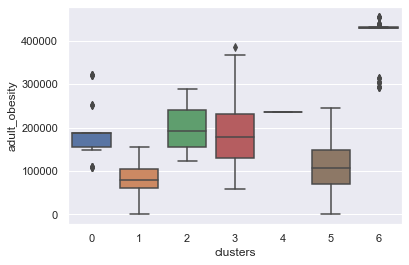

population_no_health_insurance


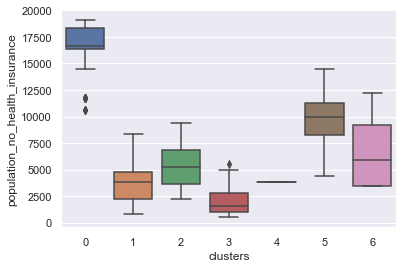

hospital_count


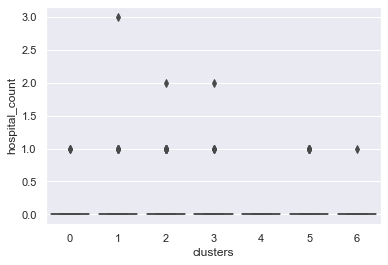

diabetes_population_number


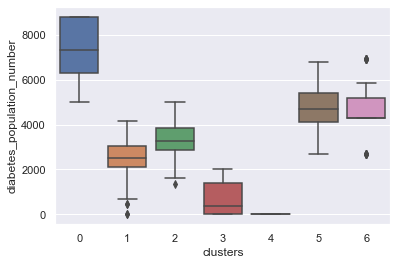

nearest_park_distance


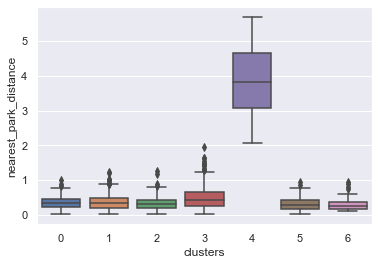

In [78]:
for f in cluster_features: 
  print(f)
  sns.boxplot(x="clusters", y=f, data=df_features_clusters)
  plt.show()